In [2]:
import pandas as pd
import numpy as np
sale=pd.read_csv("sales.csv")
print(sale.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
print(sale.describe())


       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [4]:
df = pd.DataFrame(sale)

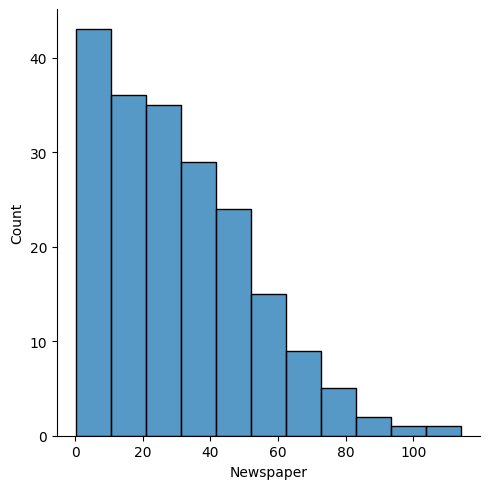

In [5]:
import seaborn as sns
sns.displot(df['Newspaper'])

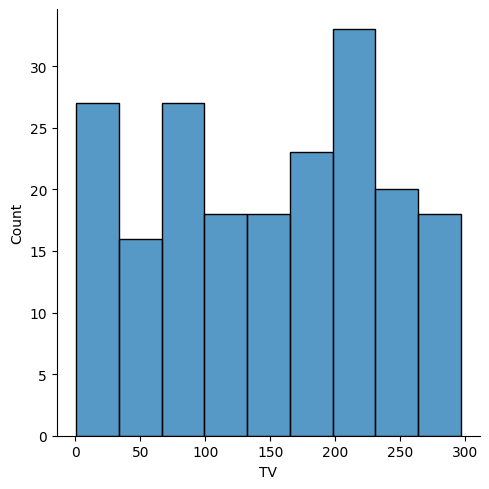

In [6]:
sns.displot(df['TV'])

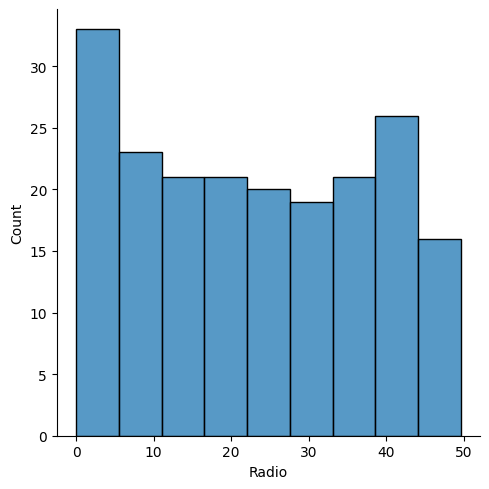

In [7]:
sns.displot(df['Radio'])

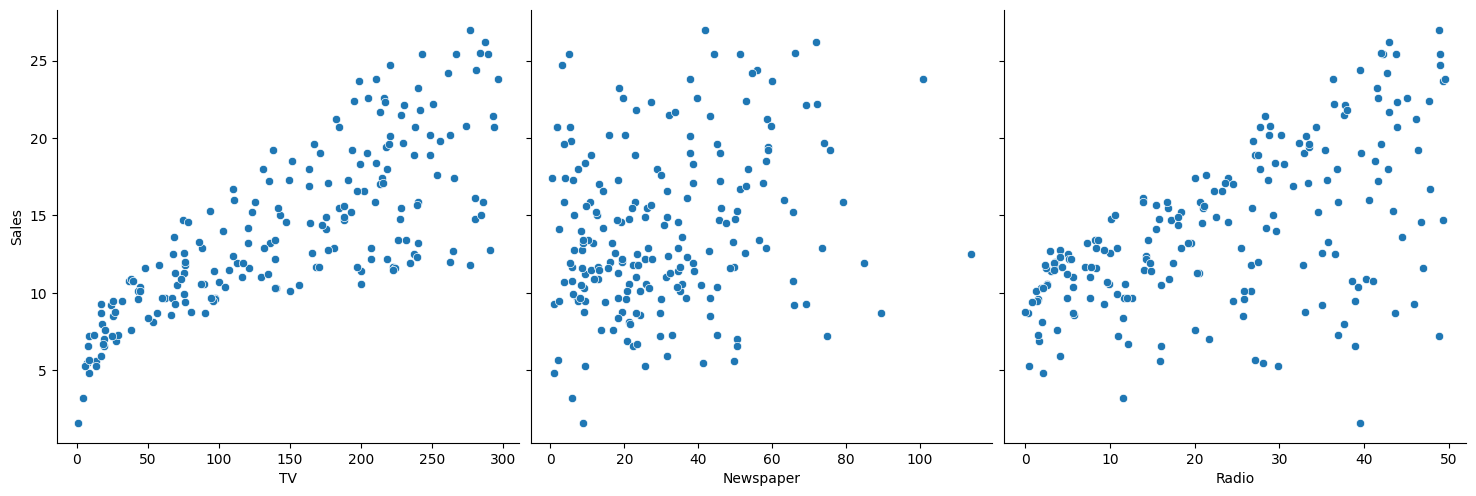

In [8]:
sns.pairplot(df, x_vars= ['TV','Newspaper','Radio'],y_vars=['Sales'],height=5,kind='scatter')

In [9]:
X=sale[['TV','Newspaper','Radio']]
y=sale['Sales']

In [10]:
#tarin and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
#model
#linear Regression
from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)

LinearRegression()

In [12]:
#test model
y_pre=lr_reg.predict(X_test)
print(y_pre)

[20.37252422 11.85243888 14.99841607  8.11268718  8.75208576  7.53153834
 13.53175462  7.06829265  9.89070411 16.45340674 16.93981993 17.2917159
  8.27305697 10.18038495 16.15390981 12.06723053 17.31270975 12.0628728
 19.92659608 19.66406345  9.20515522 16.46068717 16.6602846  18.12152578
 12.34066333  6.29193117 10.92202721 10.05688705 16.38239687  9.8525129
 13.0298963  21.0743348  15.33485394 10.55518866  5.52021959 17.56397618
 12.00006555 13.44649161 17.34080133 12.93863553]


In [13]:
#accuracy score
from sklearn.metrics import r2_score,mean_squared_error
error_score=r2_score(y_test,y_pre)
rmse=np.sqrt
print((error_score)*100)

79.49634093208108


In [14]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)


RandomForestRegressor()

In [15]:
y_pre1=rfr.predict(X_test)
print(y_pre1)


[19.85  11.828 13.085  7.447 10.309  9.328 11.876  9.328 10.673 15.962
 16.044 16.949  9.873 11.519 15.947 12.757 15.048 10.937 20.691 18.235
 10.361 17.491 16.059 19.118  8.586  7.412  6.805 10.187 16.632 11.275
  7.371 22.232 14.843 12.004  5.462 18.181 13.332 12.824 16.969 11.013]


In [16]:
error_score_1=r2_score(y_test,y_pre1)
rmse=np.sqrt
print((error_score_1)*100)
for true_label, predicted_label in zip(y_test, y_pre1):
    print(true_label, predicted_label)

94.19228568572086
20.7 19.85000000000001
12.0 11.827999999999982
13.4 13.085000000000004
7.0 7.447000000000004
10.4 10.30900000000001
8.4 9.328000000000012
11.5 11.87600000000001
8.7 9.328
10.1 10.673
15.5 15.961999999999994
15.9 16.04399999999999
17.4 16.948999999999987
9.7 9.873000000000012
11.4 11.518999999999998
14.8 15.946999999999992
11.7 12.757000000000005
16.7 15.047999999999993
11.8 10.937000000000003
20.7 20.690999999999985
19.8 18.23500000000001
10.6 10.361000000000006
16.9 17.490999999999982
15.7 16.05899999999999
18.0 19.11800000000001
8.7 8.585999999999993
7.2 7.412000000000002
1.6 6.8050000000000015
9.6 10.187000000000006
15.9 16.63199999999999
11.0 11.275000000000011
7.2 7.371000000000001
22.4 22.232000000000003
15.2 14.843000000000018
11.5 12.004000000000001
3.2 5.4620000000000015
18.0 18.18099999999998
12.2 13.332000000000008
14.0 12.824000000000005
17.0 16.968999999999983
10.8 11.012999999999998


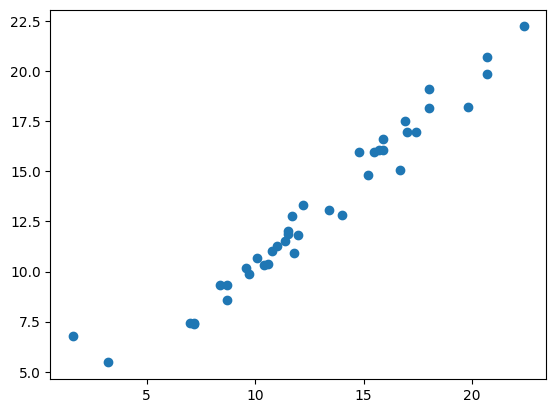

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pre1)

In [18]:
from sklearn.metrics import classification_report
thresholds = [0.5, 1.5, 2.5, 3.5]  # Adjust the thresholds based on your specific problem

# Perform binning for predicted labels
y_pre1_discrete = np.digitize(y_pre1, thresholds)

# Perform binning for true labels
y_test_discrete = np.digitize(y_test, thresholds)

report = classification_report(y_test_discrete, y_pre1_discrete)
print(report)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.95      1.00      0.97        38

    accuracy                           0.95        40
   macro avg       0.32      0.33      0.32        40
weighted avg       0.90      0.95      0.93        40



c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [19]:
import numpy as np
input_str = input(" Enter sales value for 'TV','Newspaper','Radio' ")

# Convert the input string into a list of integers
input_list = [int(x) for x in input_str.split()]

# Print the array
print("Array:", input_list)
x_new = np.array(input_list).reshape(1, -1)
prediction=rfr.predict(x_new)
print("Predicted Sales Values: {}".format(prediction))


Array: [2333, 6622, 332]
Predicted Sales Values: [26.09]


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
